In [109]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
import pandas as pd
import os
import json

import matplotlib.pyplot as plt
from datetime import datetime

import seaborn as sns
import pickle

plt.rcParams.update({'font.size': 14, 'font.family': 'serif', 'mathtext.fontset': 'dejavuserif'})

## Macchine disponibili API Gratuita

In [110]:
#provider = IBMProvider(token='ccb55572af16d8dbf7152a35cd3bbbaa2dfcd45fdc26efcc88b0e4673681c35253cbc04e1e9cfad7d484b71c3adc46f694abc774109e0acc36c5c129f2f48b38') # used for mag 8:59s | l.boffa1@studenti.unisa.it: Google auth
#provider = IBMProvider(token='4f1de20d25e004d584cc5992ebe9bcd7de79dd3bbdb72805699ffbd9fcc6ef736041f46a30aa1a3542955945f27b542de74b035ff3991b503256f1ab77a36b6a') # used for mar 9:08s | latriade003@gmail.com: Google auth
#provider = IBMProvider(token='e4fba203211bb858b68aa8f8f717d390bb00ffcb5446f454b1447775b927c65d56d8beb2b90d7beb57078d8807f3013e9c0bcafb91215acfeca6ffa1f1e6f7a3') # used for mar 7:46s |  rofetob682@cashbn.com:Formula1&2&3
#provider = IBMProvider(token='ae0af2c735f631d165a0a0f4270fcf79bed032b916448b9345d2854cb124c7aa807e3e99674a758487949d3489f837fd658a37ac6361b4e53a27dba92482dfcc') # used for mar s     |  decer19500@confmin.com:Formula1&2&3 password errata
#provider = IBMProvider(token='718bb475e897f23387ea9298c0592bbbbee623bac0f5e3e04b2befdc1b33f119c4fe259c746f868c070a262391e7849340bdc33d891498024020d2074577804a') # used for mar 8:49s |  ketofes973@kytstore.com:Formula1&2&3
#provider = IBMProvider(token='5aa696df0acae89e3cf11ea6c406889353c2c06ae64466a445a3bac0ac89f81d2d449d3cd7cef89467ab77dbf1f23e850bb6108328084f9e800370408e1d7eb8') # used for mar 10:00s|  doyid36339@egvoo.com:Formula1&2&3
#provider = IBMProvider(token='f37d21c438edc0576641f21b5a3973902efd34bdc04506261eac4fc8c3b19832fa6d3fe91b77545b09bf9e6e04268a7002c9c9e991ddc92e9eeffd28f20e1bb1') # used for mar 10:00s|  lacaveb846@dwriters.com:Formula1&2&3
#provider = IBMProvider(token='51258f57a024dc32e999206882e8bed089640eadb53dda9235d581948ca99fbc8c9c81a8341648ed0ae8b95b0f6e6585ada8c13d43a407d7de39ee9869267267') # used for mar 10:00s|  nogixa1658@dwriters.com:Formula1&2&3
#-provider = IBMProvider(token='01bf1cb13e1d8bd590f97abf00c4cd6151e260e86b1f950ef59e5396d1dd2401e773d576ed90bdd1284a1ea548e5858953f7f238dcbd5d42d88d0965fb5ee6f9') # used for may 10:00s|  secofo6631@easipro.com:Formula1&2&3
#provider = IBMProvider(token='10f0a6ba89db1dc168fec72c1b9558b4312ecaf4804c6146a80f7d0792a1d7f18fca9ad19c70dbbc16ca27ad5583a3dbbb2be21cd82ae3b134cc83c0db6bf1c3') # used for may 10:00s|  lifali6682@cybtric.com:Formula1&2&3
#provider = IBMProvider(token='30e982aa67ba84582bb440c78b9c0e86eb4bd8f0ff6de5e3fcb0fc36af6d2e74a97c47f84d99405fc4e0f8aeb08363903d96c2d1bc4be07337721158f92f45ab') # used for may 4m 59s|  kidake8178@cybtric.com:Formula1&2&3
#provider = IBMProvider(token='e3429404485822227c4bea687d8948eb6c06ab2b90361bb8c067f818601a1bdb274b1b7c0d255730533a342c76886fea3b37042083b1439a3eb3e77348d0e1b5') # used for may 10:00s|  mevilo5446@dmener.com:Formula1&2&3
#provider = IBMProvider(token='f6be16a58c45f1a19b78a5c82587ee0db41d720cbe55c1361ff4445e9c156c99def073580003418c93b4915587bba0c5c11dd0a8bdf8fc758752585504bab76a') # used for may 10:00s|  xedima4477@cybtric.com:Formula1&2&3
#provider = IBMProvider(token='8c865d438487275bb939e03adfb9ebd4c3e3fe4adce788c4655b12b5a938a17de0139cc89d372c60bc9c6037496beb8377f4d84ce30c194bb908ae27047c0d09') # used for may 10:00s|  gofek77745@dmener.com:Formula1&2&3 
#provider = IBMProvider(token='a4fc597dc99b6aefc81cfdb156b9178fee44c6f7fafc243ff164ca7f1e5b2b8e3dfe7ad348910efa1ad3f025a00e0ff10d16489381d20397b866e0767c35e73d') # used for may 10:00s|  vinopag651@dmener.com:Formula1&2&3
#provider = IBMProvider(token='aa1fb35b0ea4b19501f69dccb597f699052c224709c6b4b10f6d56923362c04e81879b7a8eb0490f0a190bc86196c8397180687e70ff9655cc69cd01eecd07e0') # used for may 10:00s|  mayil93733@dmener.com:Formula1&2&3
#provider = IBMProvider(token='cd7d4fd4dfa667925649680c126308a3f0b1a2427ee439cbad4b15b07851ef8d6f043b565ebc6bf327d958af1b18cb23e3301dad0c4c65447934315663c7393d') # used for may 10:00s|  gevive1534@boyaga.com:Formula1&2&3
#provider = IBMProvider(token='d2db6ee13a6d067cdbc440b8edc5ef01f508c1d84e105bab72464b976f0a5746f0c791c2b71077f83ef959803b1f1e12f49e56dcbe41206e9bc59fa656dbe211') # used for may 10:00s|  nenomal448@birige.com:Formula1&2&3 
#provider = IBMProvider(token='7d8ced7ad49ffe6647211796e4e2ec5c2e03a1eb1a735bc8ecc3fd9f027f7cd5b071557123b89e6ba62b3dce56f415582dcd9d60db45df0d7dd63b5ec943261f') # used for may 10:00s|  gohav85022@boyaga.com:Formula1&2&3
#provider = IBMProvider(token='7b2f5c7a9389204512be51d64ae1427ecbbf84e659f612fc87ca200ccdf6ff4dcae51c8aed3dfec2cc9f263c04e411e7090ca86f9c26a37caa837e0faf436b93') # used for may 10:00s|  bojadol903@boyaga.com:Formula1&2&3
#provider = IBMProvider(token='86dfc7e66a69140ea11a1febabd1efbc7555a6edf109b9e80209123d626e8389274ef0811b41ed2391a12ba00b962d97bffb49cd64deeba6f9d316341c651d83') # used for may 10:00s|  tatas21376@birige.com:Formula1&2&3
#provider = IBMProvider(token='8473e8243733eb78d6a182829bfe1594579c9d8a14f7ca700129a8cbde5a6c30f4ffe0fe5e215ea1d7eed6a34d13232b05e460d6f3755184e6322461ba174e48') # used for may 10:00s|  welilo1514@boyaga.com:Formula1&2&3
#provider = IBMProvider(token='9c7474769ff292d998b9da1ed4b5fcf317a021f5f78489e0faf81577595831c1ac5b9e771f9405c0abf47e3002bcb1ab3cf6fbdc34640b297da39931c85ec4ef') # used for may 10:00s|  simop72949@birige.com:Formula1&2&3
#provider = IBMProvider(token='0bd84b23a57588e03a9f5c5b2e4f52e585d5e8f476b450e339b1c33066c537a1a09a7494ada5bcea946bde9c3e5123cb86a8911af6c31212c99a3a23cce9d9fa') # used for may 10:00s| cogac41367@birige.com:Formula1&2&3
#provider = IBMProvider(token='cffef64b8d89056a4757374a2180d51000834cd0f437fd9886089b20c06d7a84e5ecbdf3ce5420a8464b4ec070a070251ef2b2a88d555dedc73b794f6bff7620') # used for may 10:00s| habor79704@birige.com:Formula1&2&3
#provider = IBMProvider(token='261604e957f7e97203dcf18b90243014fa303d17b676b76542852e5e029edb27f7f272aa77aaf3a92ba91092e9b51b604d793397db841cd1f03e952ae606bd4c') # used for may 10:00s| gomid14498@flektel.com:Formula1&2&3
#provider = IBMProvider(token='fc25755e1f1b9e356b88451a4035d75cf7c63e693cb17c141e9c84f5dcd6503a5f425121e3001e1df0358a7d352f0dc1b2eff448d13780a9ab0c5fd6c5ae8a1a') # used for may 10:00s| mopodas677@infornma.com:Formula1&2&3
#provider = IBMProvider(token='748bc37768cd2961cccf1bb8b8d21c42e2017ac0b1262fe870565bdc18e2ef9d6285dc6869572fc354dd5fce1fe1bdecf5d3d4af79f588a576b4c2e507740772') # used for may 00:00s| xitabi1415@flektel.com:Formula1&2&3
#provider = IBMProvider(token='a890ce2e307a82b13b8c1b46aaf41b68ccca2df4e01b1004d1f9e1979ce6a36dd1d4e581122d44450a139e90707b417f9128084e248f9df870fbce64a5d921e3') # used for may 10:00s| mohepa4498@infornma.com:Formula1&2&3
#provider = IBMProvider(token='658e4756dd8fc968c61cb5f43f11c6920ec40fa42227132123814467343e5bedbb4b2ade8185fbedffcd987e0284203d2d02c64cf719264ca19c6e301d1db181') # used for may 10:00s| cedona2254@infornma.com:Formula1&2&3 
#provider = IBMProvider(token='a9c1b002216b82416edd258b90f0677467a9a73cc118b28d3d95f2f70a961acc620392d9eab58893fc1a9f1eed415618f23fa5e4d0e6813322e7f3b726f56a1b') # used for may 00:00s| vetabet588@infornma.com:Formula1&2&3

In [111]:
service = QiskitRuntimeService(channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='01bf1cb13e1d8bd590f97abf00c4cd6151e260e86b1f950ef59e5396d1dd2401e773d576ed90bdd1284a1ea548e5858953f7f238dcbd5d42d88d0965fb5ee6f9')
# IBM Quantum channel; set to default

# Mostro i backend disponibili per l'esecuzione
print(service.backends())

backend_maps = {
    index: backend.name.split('_')[1] for index, backend in enumerate(service.backends())
}

# Visualizo che i nomi siano corretti 
print(backend_maps)

# Inizializzo il backend array 
backend_array=[]
backend_map = backend_map = {index: backend.name.split('_')[1] for index, backend in enumerate(service.backends(operational=True, simulator=False))}

print("Macchine disponibili:")
for index, name in backend_map.items():
    print(f"{index}: {name}")
    
scelta = input("Scegli un'opzione (1/2/3): 1 meno occupata, 2 tutte, 3 scegli manualmente ")

# Esegui un'azione in base alla scelta
if scelta == "1":
    print("Hai scelto l'opzione 1!")
    print("Scelgo la macchina meno occupata")
    backend_array.append(service.least_busy(operational=True, simulator=False, min_num_qubits=127))
    backend_map = {
        index: backend.name.split('_')[1] for index, backend in enumerate(backend_array)
    }
    print(backend_array)
    print(backend_map)
elif scelta == "2":
    print("Hai scelto l'opzione 2!")
    for _, name in backend_maps.items():
            class_name = f"ibm_{name}"  
            try:
                backend_array.append(service.backend(class_name, instance='ibm-q/open/main'))
            except KeyError:
                print(f"Error: Class '{class_name}' not found in qiskit.test.mock.")
    backend_map = {
        index: backend.name.split('_')[1] for index, backend in enumerate(backend_array)
    }
    print(backend_array)
    print(backend_map)
elif scelta == "3":
    print("Hai scelto l'opzione 3!")
    scelte_utente = input("Inserisci gli indici delle macchine separate da una virgola: ")
    indici = [int(i.strip()) for i in scelte_utente.split(',') if i.strip().isdigit()]
    backend_array = []
    new_backend_map = {}
    for index in indici:
        if index in backend_map:
            class_name = f"ibm_{backend_map[index]}"
            try:
                backend = service.backend(class_name, instance='ibm-q/open/main')
                backend_array.append(backend)
                new_backend_map[len(new_backend_map)] = backend.name.split('_')[1]
            except Exception as e:
                print(f"Errore nel trovare la macchina '{class_name}': {e}")
    backend_map = new_backend_map
    print("Macchine selezionate:", [backend.name for backend in backend_array])
    print("Nuovo mapping aggiornato:", backend_map)
else:
    print("Scelta non valida!")

[<IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_brisbane')>]
{0: 'sherbrooke', 1: 'brisbane'}
Macchine disponibili:
0: sherbrooke
1: brisbane
Hai scelto l'opzione 2!
[<IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_brisbane')>]
{0: 'sherbrooke', 1: 'brisbane'}


In [112]:
def normalized_fractional_hamming_intradistance(dict1, dict2):
    # Verifica se i dizionari hanno le stesse chiavi
    if set(dict1.keys()) != set(dict2.keys()):
        raise ValueError("Response must have the same lenght")
    # Calcola la somma delle differenze assolute tra i valori corrispondenti
    sum_diff = sum(abs((dict1[key] - dict2[key])) for key in dict1.keys())
    fractional_hamming_distance = sum_diff / 2 #len(dict1) perchè la somma ha come range [0,2] quindi /2 per normalizzare a range [0,1]
    return fractional_hamming_distance

In [113]:
n_challenge = int(input("Inserisci il numero di challenge da utilizzare (10/20): "))
n_qubits = int(input("Inserisci il numero di QBITS: "))
shots= int(input("Inserisci il numero shots: "))
n_runs = int(input("Inserisci il numero di runs ")) # minimun 2 runs altrimenti instability non viene calcolata per come è stata pensata

# Loading from file (this is the only one file used for all the metrics)
file_name = f'./results/configuration_challenges/random_arrays_{n_challenge}.pkl'

if os.path.exists(file_name):
    with open(file_name, 'rb') as f:
        a_challenge, b_challenge, c_challenge, d_challenge, e_challenge, f_challenge = pickle.load(f)
    print(f"Arrays loaded from '{file_name}'")
else:
    print(f"Error: File '{file_name}' not found.")

Arrays loaded from './results/configuration_challenges/random_arrays_10.pkl'


In [114]:
def qcirc_venus(i):
    circuit = QuantumCircuit(n_qubits,n_qubits)
    for j in range(n_qubits):
        if j%2==0:
            circuit.ry(b_challenge[i][j],j)
            circuit.rz(a_challenge[i][j],j)
        else:
            circuit.ry(e_challenge[i][j],j)
            circuit.rz(d_challenge[i][j],j)

    for j in range(n_qubits -2,-1,-1):
        circuit.cx(j,j+1)

    for j in range(n_qubits):
        if j%2==0:
            circuit.ry(e_challenge[i][j],j)
            circuit.rz(d_challenge[i][j],j)
        else:
            circuit.ry(b_challenge[i][j],j)
            circuit.rz(a_challenge[i][j],j) 

    circuit.barrier()

    circuit.measure(range(n_qubits), range(n_qubits))
    name=f"./results/circuit/Venus_real_{n_qubits}_.png"
    circuit.draw('mpl',  filename=name)
    return circuit

In [115]:
def qcirc_mercury(i):
    circuit = QuantumCircuit(n_qubits, n_qubits)
    
    # Applicazione di rotazioni iniziali con Hadamard per maggiore superposizione
    for j in range(n_qubits):
        circuit.h(j)
        if j % 2 == 0:
            circuit.ry(b_challenge[i][j], j)
            circuit.rz(a_challenge[i][j], j)
        else:
            circuit.ry(e_challenge[i][j], j)
            circuit.rz(d_challenge[i][j], j)
    
    # Entanglement con CNOT e CZ per aumentare la distanza di Hamming
    for j in range(n_qubits - 2, -1, -1):
        circuit.cx(j, j + 1)
        circuit.cz(j, (j + 2) % n_qubits)
    
    circuit.barrier()
    
    # Ulteriori rotazioni per diversificare le misure
    for j in range(n_qubits):
        if j % 2 == 0:
            circuit.ry(e_challenge[i][j], j)
            circuit.rz(d_challenge[i][j], j)
        else:
            circuit.ry(b_challenge[i][j], j)
            circuit.rz(a_challenge[i][j], j)
            circuit.cz(j, (j - 1) % n_qubits)
    
    circuit.barrier()
    circuit.measure(range(n_qubits), range(n_qubits))
    
    name = f"./results/circuit/Mercury_real_{n_qubits}_.png"
    circuit.draw('mpl', filename=name)
    
    return circuit


In [116]:
def qcirc_mars(i):
  # Create a Quantum Circuit
  circuit = QuantumCircuit(n_qubits,n_qubits)
  #calcolo media response
  for j in range(n_qubits):
    if j%2==0:
      circuit.rx(c_challenge[i][j],j)
      circuit.rz(a_challenge[i][j],j)
    else:
      circuit.ry(e_challenge[i][j],j)
      circuit.rz(d_challenge[i][j],j)
      circuit.cz(j,j-1)

  for j in range(n_qubits):
    if j==0:
      circuit.rz(a_challenge[i][j],j)
    elif j==n_qubits-1:
      circuit.rz(a_challenge[i][j],j)
    else:
      circuit.rx(f_challenge[i][j],j)
      circuit.ry(e_challenge[i][j],j)

  circuit.barrier()
   
  for j in range(1,n_qubits-1):
    if j%2==1:
      circuit.rz(a_challenge[i][j],j)
      circuit.h(j)
    else:
      circuit.h(j)
      circuit.rz(d_challenge[i][j],j)


  circuit.barrier()
  circuit.measure(range(n_qubits), range(n_qubits))
  #drawing the circuit
  name=f"./results/circuit/Mars_real_{n_qubits}_{n_challenge}.png"
  circuit.draw('mpl',  filename=name)
  return circuit

In [117]:
def qcirc_saturn(i):
    # Create a Quantum Circuit
    circuit = QuantumCircuit(n_qubits, n_qubits)
    
    # Creazione della superposizione iniziale
    for j in range(n_qubits):
        if j % 2 == 0:
            circuit.h(j)
            circuit.rx(c_challenge[i][j], j)
            circuit.rz(a_challenge[i][j], j)
        else:
            circuit.h(j)
            circuit.ry(e_challenge[i][j], j)
            circuit.rz(d_challenge[i][j], j)
            circuit.cz(j, j - 1)
    
    circuit.barrier()
    
    # Introduzione di ulteriori rotazioni per aumentare la variabilità
    for j in range(n_qubits):
        if j == 0 or j == n_qubits - 1:
            circuit.rz(a_challenge[i][j], j)
        else:
            circuit.rx(f_challenge[i][j], j)
            circuit.ry(e_challenge[i][j], j)
            circuit.cz(j, (j + 1) % n_qubits)
    
    circuit.barrier()
    
    # Alternanza di Hadamard e rotazioni per ampliare la distanza di Hamming
    for j in range(1, n_qubits - 1):
        if j % 2 == 1:
            circuit.rz(a_challenge[i][j], j)
            circuit.h(j)
            circuit.cz(j, j - 1)
        else:
            circuit.h(j)
            circuit.rz(d_challenge[i][j], j)
            circuit.cz(j, j + 1)
    
    circuit.barrier()
    circuit.measure(range(n_qubits), range(n_qubits))
    
    # Drawing the circuit
    name = f"./results/circuit/Saturn_real_{n_qubits}_{n_challenge}.png"
    circuit.draw('mpl', filename=name)
    
    return circuit

In [118]:
def qcirc_jupiter(i):
    circuit = QuantumCircuit(n_qubits, n_qubits)
    
    # Superposizione iniziale con variazione nelle rotazioni
    for j in range(n_qubits):
        circuit.h(j)
        circuit.rz(a_challenge[i][j], j)
        if j % 2 == 0:
            circuit.rx(c_challenge[i][j], j)
        else:
            circuit.ry(e_challenge[i][j], j)
            if j > 0:
                circuit.cz(j, j - 1)
    
    circuit.barrier()
    
    # Maggiore entanglement per aumentare uniqueness
    for j in range(0, n_qubits - 1, 2):
        circuit.cx(j, j + 1)
        circuit.rz(d_challenge[i][j], j + 1)
    
    circuit.barrier()
    
    # Ulteriore randomizzazione e propagazione dell'informazione
    for j in range(n_qubits):
        if j % 2 == 0:
            circuit.ry(f_challenge[i][j], j)
        else:
            circuit.rx(a_challenge[i][j], j)
            circuit.cz(j, (j + 1) % n_qubits)
    
    circuit.barrier()
    
    # Finalizzazione con misurazioni per ridurre instability
    for j in range(n_qubits):
        if j % 3 == 0:
            circuit.h(j)
        elif j % 3 == 1:
            circuit.rz(d_challenge[i][j], j)
        circuit.measure(j, j)
    
     # Drawing the circuit
    name = f"./results/circuit/Jupiter_real_{n_qubits}_{n_challenge}.png"
    circuit.draw('mpl', filename=name)

    return circuit

In [119]:
def qcirc_earth(i):
  # Create a Quantum Circuit
  circuit = QuantumCircuit(n_qubits,n_qubits)
  #calcolo media response
  for j in range(n_qubits):
    if j%2==0:
      circuit.rx(c_challenge[i][j],j)
      circuit.ry(b_challenge[i][j],j)
      circuit.rz(a_challenge[i][j],j)
    else:
      circuit.rx(f_challenge[i][j],j)
      circuit.ry(e_challenge[i][j],j)
      circuit.rz(d_challenge[i][j],j)
      circuit.cz(j,j-1)

  for j in range(1,n_qubits-1):
    if j%2==1:
      circuit.rx(c_challenge[i][j],j)
      circuit.ry(b_challenge[i][j],j)
      circuit.rz(a_challenge[i][j],j)
    else:
      circuit.rx(f_challenge[i][j],j)
      circuit.ry(e_challenge[i][j],j)
      circuit.rz(d_challenge[i][j],j)
      circuit.cz(j,j-1)

  circuit.barrier()
  
  for j in range(n_qubits):
      if j%2==0:
        circuit.rx(c_challenge[i][j],j)
      else:
        circuit.rx(f_challenge[i][j],j)

  circuit.barrier()
  circuit.measure(range(n_qubits), range(n_qubits))
  #drawing the circuit
  name=f"./results/circuit/Earth_real_{n_qubits}_{n_challenge}.png"
  circuit.draw('mpl',  filename=name)
  return circuit

In [120]:
def qcirc_uranus(i):
    circuit = QuantumCircuit(n_qubits, n_qubits)
    
    # Prima fase: creazione di una superposizione più diversificata
    for j in range(n_qubits):
        circuit.h(j)
        if j % 2 == 0:
            circuit.rx(c_challenge[i][j], j)
            circuit.rz(a_challenge[i][j], j)
        else:
            circuit.ry(e_challenge[i][j], j)
            circuit.rz(d_challenge[i][j], j)
    
    circuit.barrier()
    
    # Seconda fase: interazioni incrociate per aumentare la distanza di Hamming
    for j in range(n_qubits - 1):
        if j % 2 == 0:
            circuit.cz(j, j + 1)
        else:
            circuit.cx(j, j + 1)
    
    circuit.barrier()
    
    # Terza fase: rotazioni aggiuntive per maggiore entropia
    for j in range(n_qubits):
        circuit.ry(b_challenge[i][j], j)
        circuit.rz(f_challenge[i][j], j)
        if j % 2 == 0 and j < n_qubits - 1:
            circuit.cx(j, j + 1)
    
    circuit.barrier()
    
    # Misurazione finale
    circuit.measure(range(n_qubits), range(n_qubits))
      #drawing the circuit
    name=f"./results/circuit/uranus_{n_qubits}_{n_challenge}.png"
    circuit.draw('mpl',  filename=name)
    return circuit


In [121]:
def qcirc_uranus_titania(i):
    circuit = QuantumCircuit(n_qubits, n_qubits)
    
    # Prima fase: creazione di una superposizione più diversificata
    for j in range(n_qubits):
        circuit.h(j)
        if j % 2 == 0:
            circuit.rx(c_challenge[i][j], j)
            circuit.rz(a_challenge[i][j], j)
        else:
            circuit.ry(e_challenge[i][j], j)
            circuit.rz(d_challenge[i][j], j)
    
    circuit.barrier()
    
    # Seconda fase: interazioni incrociate per aumentare la distanza di Hamming
    for j in range(n_qubits - 1):
        if j % 2 == 0:
            circuit.cz(j, j + 1)
        else:
            circuit.cx(j, j + 1)
    
    circuit.barrier()
    
    for j in range(n_qubits -2,-1,-1):
        circuit.cx(j,j+1)

    for j in range(n_qubits):
        if j%2==0:
            circuit.ry(e_challenge[i][j],j)
            circuit.rz(d_challenge[i][j],j)
        else:
            circuit.ry(b_challenge[i][j],j)
            circuit.rz(f_challenge[i][j],j) 

    circuit.barrier()
    
    circuit.measure(range(n_qubits), range(n_qubits))
    
    # Disegno del circuito
    name = f"./results/circuit/Uranus_Titania_{n_qubits}_{n_challenge}.png"
    circuit.draw('mpl', filename=name)
    
    return circuit


## Calcolo su QPU IBM

In [122]:
def qpuf_ibm(qc,backend):
  
  pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
  isa_circuit = pm.run(qc)
  
  sampler = Sampler(backend)
  job = sampler.run(isa_circuit, shots=shots)
  result = job.result() 

  pub_result = []

  for i in range(n_challenge*n_runs):
    pub_result.append(result[i].data.c.get_counts())
    # da controllare con franco 
    #print(f" >> c output register counts: {result[i].data.c.get_counts()}")
  
  #lista delle responses formattate
  responses=[]
  for j in range(len(pub_result)):
    #iesima response
    response = {}
    for i in range(2**n_qubits):
      binary_string = format(i, '0' + str(n_qubits) + 'b')
      #se trova la combinazione copia il valore e lo divide per il numero dei shots per normalizzarlo tra 0 e 1, altrimenti mette 0
      response[binary_string] = pub_result[j].get(binary_string,0)/shots
    responses.append(response)
  return responses

def run_qcirc(i,scelta):
  qc=[]
  
  if scelta == "1":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_earth(n))
    r=qpuf_ibm(qc,backend_array[i])
  
  elif scelta == "2":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_mars(n))
    r=qpuf_ibm(qc,backend_array[i])
  
  elif scelta == "3":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_saturn(n))
    r=qpuf_ibm(qc,backend_array[i])

  elif scelta == "4":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_jupiter(n))
    r=qpuf_ibm(qc,backend_array[i])

  elif scelta == "5":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_venus(n))
    r=qpuf_ibm(qc,backend_array[i])

  elif scelta == "6":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_mercury(n))
    r=qpuf_ibm(qc,backend_array[i])
  
  elif scelta == "7":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_uranus(n))
    r=qpuf_ibm(qc,backend_array[i])

  elif scelta == "8":
    for n in range(n_challenge):
      for _ in range(n_runs):
          #metti in fila tutti i circuiti
          qc.append(qcirc_uranus_titania(n))
    r=qpuf_ibm(qc,backend_array[i])
  
  #cosi salvo il backend e utilizzo lo stesso per le altre metriche 
  file_path = f'./results/backend/real/{circuit_type}/backend_{backend_map[i]}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.json'
  if not os.path.exists(file_path):
    with open(file_path, 'w') as json_file:
        json.dump(r, json_file)
    print(f"Backend_{backend_map[i]} salvato correttamente")
  else:
    print(f"Il file {file_path} esiste già. Salvataggio annullato.")

  
def instability(i):
  inst_table = pd.DataFrame(columns=["n-th challenge", "i-th execution", "j-th execution", "dist"])
    
  file_path = f'./results/backend/real/{circuit_type}/backend_{backend_map[i]}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.json'
  with open(file_path, 'r') as json_file:
    response=json.load(json_file)

  for n in range(n_challenge):
      #estrae i circuiti solo per quella challenge
      same_response = [response[n*n_runs + k] for k in range(n_runs)]

      for i in range(len(same_response)):
          for j in range(i + 1, len(same_response)):
              distance = normalized_fractional_hamming_intradistance(same_response[i], same_response[j])
              inst_table.loc[len(inst_table)] = [n, i, j, distance]
    
  inst_table[['n-th challenge', 'i-th execution', 'j-th execution']] = inst_table[['n-th challenge', 'i-th execution', 'j-th execution']].astype(int)
  return inst_table

def randomness(i): 
  rand_table =pd.DataFrame(columns=["n-th challenge", "m-th challenge", "dist"])
  #cosi mi ricrea il backend e perdo il salvataggio precendente
 
  file_path = f'./results/backend/real/{circuit_type}/backend_{backend_map[i]}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.json'
  with open(file_path, 'r') as json_file:
    response=json.load(json_file)

  all_same_runs= []

  for i in range(n_challenge):
    same_runs = response[0+(i*n_runs)]  #devo skippare nruns alla volta e le isolo prima (cioe le tiro fuori)
    all_same_runs.append(same_runs)
  
  for n in range(len(all_same_runs)):
    for m in range(n + 1, len(all_same_runs)): # per evitare di calcolare la distanza tra le stesse coppie ma ordine invertito
      distance = normalized_fractional_hamming_intradistance(all_same_runs[n], all_same_runs[m])
      rand_table.loc[len(rand_table)] = [n, m, distance]
    
  rand_table['n-th challenge']=rand_table['n-th challenge'].astype(int)
  rand_table['m-th challenge']=rand_table['m-th challenge'].astype(int)
  return rand_table

def uniqueness():
  unique_table = pd.DataFrame(columns=["i-th device","j-th device","n-th challenge", "dist"])
  responses=[]
  for i in range(len(backend_array)):
    file_path = f'./results/backend/real/{circuit_type}/backend_{backend_map[i]}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.json'
    with open(file_path, 'r') as json_file:
      r=json.load(json_file)
    responses.append(r)  
  
  # Mantengo la struttura: macchina -> challenge -> run
  all_same_runs = []
  for i in range(len(backend_array)):  # Lunghezza dei backend
      machine_challenges = []  # Lista per le challenge di questa macchina
      for j in range(n_challenge):
          # Estrai i run per questa challenge
          same_runs = responses[i][j*n_runs]  # Prendo tutti i challenge per della stessa runs
          machine_challenges.append(same_runs)  # Aggiungo le challenge della run alla lista della macchina
      all_same_runs.append(machine_challenges)  # Aggiungo la struttura della macchina
  
  for i in range(len(backend_array)): #lunghezza backend
    for j in range(i + 1, len(backend_array)):
      for n in range(n_challenge):
        #print(f"macchina {i} e macchina {j} su challenge {n}")
        distance = normalized_fractional_hamming_intradistance(all_same_runs[i][n], all_same_runs[j][n])
        unique_table.loc[len(unique_table)] = [i,j,n, distance]
  unique_table['i-th device']=unique_table['i-th device'].astype(int)
  unique_table['j-th device']=unique_table['j-th device'].astype(int)
  unique_table['n-th challenge']=unique_table['n-th challenge'].astype(int)
  return unique_table

print(backend_array) 
print(backend_map)

scelta = input("Scegli un'opzione (1/2/3/4/5/6/7/8): 1 Earth, 2 Mars, 3 Saturn, 4 Jupiter, 5 Venus, 6 Mercury, 7 Uranus, 8 Uranus-Titania")
if scelta == "1":
   print("Hai scelto l'opzione 1 Earth!")
   circuit_type = 'earth'
elif scelta == "2":
   print("Hai scelto l'opzione Mars!")
   circuit_type = 'mars'
elif scelta == "3":
   print("Hai scelto l'opzione Saturn") 
   circuit_type = 'saturn'
elif scelta == "4":
   print("Hai scelto l'opzione Jupiter") 
   circuit_type = 'jupiter' 
elif scelta == "5":
   print("Hai scelto l'opzione Venus") 
   circuit_type = 'venus'
elif scelta == "6":
   print("Hai scelto l'opzione Mercury") 
   circuit_type = 'mercury'
elif scelta == "7":
   print("Hai scelto l'opzione Uranus") 
   circuit_type = 'uranus'
elif scelta == "8":
   print("Hai scelto l'opzione Uranus-Titania") 
   circuit_type = 'uranusTitania'

for i in range(len(backend_array)):
  run_qcirc(i,scelta)

[<IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_brisbane')>]
{0: 'sherbrooke', 1: 'brisbane'}
Hai scelto l'opzione Venus


/Users/lucaboffa/Desktop/Tesi/envTesi/lib/python3.11/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:857: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


Il file ./results/backend/real/venus/backend_sherbrooke_nq16_nc10_s20000_nr5.json esiste già. Salvataggio annullato.


/Users/lucaboffa/Desktop/Tesi/envTesi/lib/python3.11/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:857: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


Backend_brisbane salvato correttamente


## Calcolo i risultati

In [123]:
if len(backend_array) < 1:
    raise ValueError("Errore: Nessuna macchina selezionata, impossibile eseguire i test.")
if len(backend_array) < 2:
    raise ValueError("Errore: poche macchine selezionate, impossibile eseguire i test.")

current_time = datetime.now().strftime("%Y-%m-%d__%H-%M")
folder_name = f'{circuit_type}_nq{n_qubits}_nc{n_challenge}_s{shots}_{n_runs}_{current_time}'

# Percorso delle cartelle da creare
folder_paths = [
    f'./results/instability/real/{folder_name}',
    f'./results/randomness/real/{folder_name}',
]

# Se la dimensione di backend_array è maggiore di 1, aggiungi la cartella uniqueness
if len(backend_array) > 1:
    folder_paths.append(f'./results/uniqueness/real/{folder_name}')

# Creazione delle cartelle se non esistono già
for folder_path in folder_paths:
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Cartella '{folder_path}' creata con successo.")
    else:
        print(f"La cartella '{folder_path}' esiste già.")

inst_table=[]

rand_table=[]

for i, backend_name in backend_map.items():
    if(n_runs < 2):
       print("Instability non calcolabile con una sola runs!")
    else:
      inst_table.append(instability(i))
      file_path = f'./results/instability/real/{folder_name}/inst_table_{backend_name}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.csv'
      inst_table[i].to_csv(file_path, index=False)
      print("Dati salvati correttamente in:", file_path)

    rand_table.append(randomness(i))
    file_path = f'./results/randomness/real/{folder_name}/rand_table_{backend_name}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.csv'
    rand_table[i].to_csv(file_path, index=False)
    print("Dati salvati correttamente in:", file_path)

if(len(backend_array) < 2):
  print("Uniqueness non calcolabile con una sola macchina!")
else:
  unique_table=uniqueness()
  file_path = f'./results/uniqueness/real/{folder_name}/unique_table_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.csv'
  unique_table.to_csv(file_path, index=False)
  print("Dati salvati correttamente in:", file_path)
  unique_table
    
inst_table[0]
rand_table[0]

Cartella './results/instability/real/venus_nq16_nc10_s20000_5_2025-06-09__18-37' creata con successo.
Cartella './results/randomness/real/venus_nq16_nc10_s20000_5_2025-06-09__18-37' creata con successo.
Cartella './results/uniqueness/real/venus_nq16_nc10_s20000_5_2025-06-09__18-37' creata con successo.
Dati salvati correttamente in: ./results/instability/real/venus_nq16_nc10_s20000_5_2025-06-09__18-37/inst_table_sherbrooke_nq16_nc10_s20000_nr5.csv
Dati salvati correttamente in: ./results/randomness/real/venus_nq16_nc10_s20000_5_2025-06-09__18-37/rand_table_sherbrooke_nq16_nc10_s20000_nr5.csv
Dati salvati correttamente in: ./results/instability/real/venus_nq16_nc10_s20000_5_2025-06-09__18-37/inst_table_brisbane_nq16_nc10_s20000_nr5.csv
Dati salvati correttamente in: ./results/randomness/real/venus_nq16_nc10_s20000_5_2025-06-09__18-37/rand_table_brisbane_nq16_nc10_s20000_nr5.csv
Dati salvati correttamente in: ./results/uniqueness/real/venus_nq16_nc10_s20000_5_2025-06-09__18-37/unique_tab

,n-th challenge,m-th challenge,dist
0,0,1,0.86000
1,0,2,0.85025
2,0,3,0.82480
3,0,4,0.82390
4,0,5,0.94855
5,0,6,0.89160
6,0,7,0.85650
7,0,8,0.90280
8,0,9,0.87220
9,1,2,0.92975


# Risultati instability

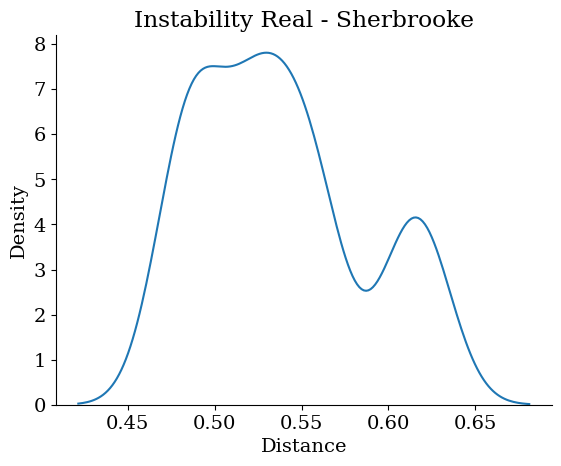

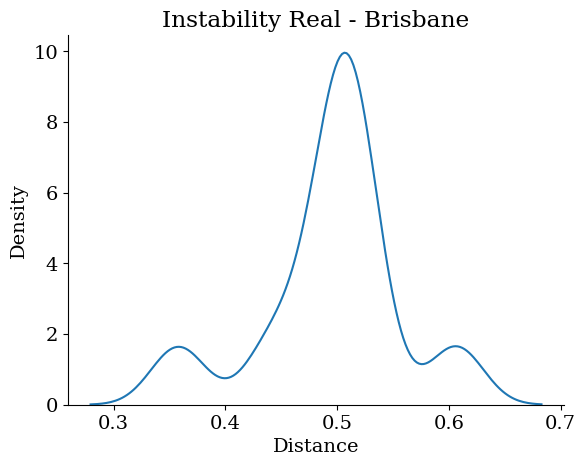

In [124]:
if(n_runs < 2):
    print("Instability non calcolabile con una sola runs!")
else:
    for i, (backend_name, tab) in enumerate(zip(backend_map.values(), inst_table)):
        sns.kdeplot(tab['dist'])
        # Setto il titolo del grafico alla relativa macchina
        plt.title(f'Instability Real - {backend_name.capitalize()}')
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.xlabel('Distance')
        # Salvo con il nome relativo della macchina
        plt.savefig(f'./results/instability/real/{folder_name}/instability_{backend_name}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.png')
        # Visualizzo il grafico
        plt.show()

## Risultati Randomness

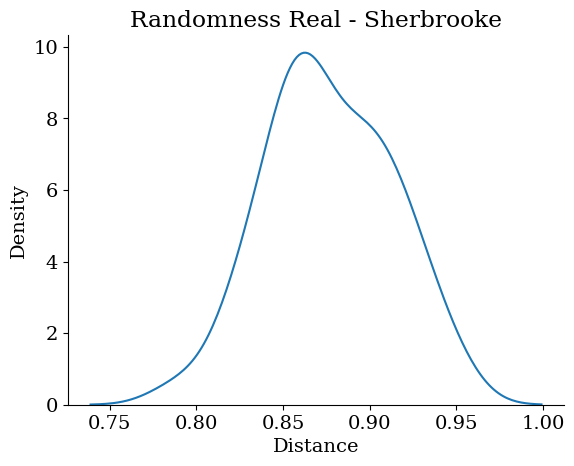

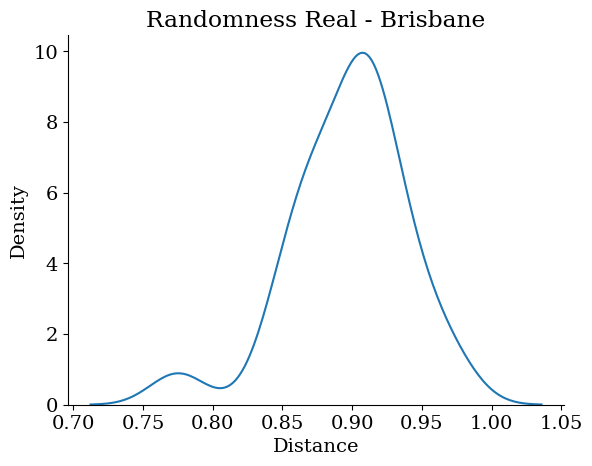

In [125]:
for i, (backend_name, tab) in enumerate(zip(backend_map.values(), rand_table)):
    sns.kdeplot(tab['dist'])
    plt.title(f'Randomness Real - {backend_name.capitalize()}')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Distance')
    
    plt.savefig(f'./results/randomness/real/{folder_name}/randomness_real_{backend_name}_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.png')
    
    plt.show()

## Risultati Uniqueness

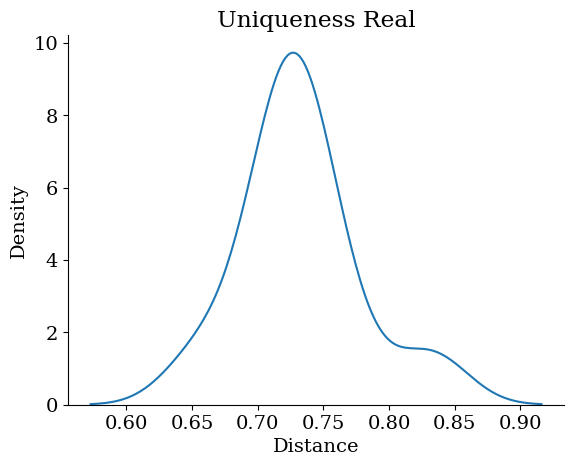

In [126]:
if(len(backend_array) < 2):
    print("Uniqueness non calcolabile con meno di 2 macchine")
else:
    sns.kdeplot(unique_table['dist'])
    plt.title('Uniqueness Real')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Distance')

    plt.savefig(f'./results/uniqueness/real/{folder_name}/uniqueness_nq{n_qubits}_nc{n_challenge}_s{shots}_nr{n_runs}.png')

    plt.show()